## Trabajo Práctico 2
- Tomás Koller
- Alan Gurmendi

## Ejercicio 1: Implementar Detector de Máximo enfoque

### Importamos librerías

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Testeamos que se pueda ver los primeros 5 frames del vídeo

In [55]:
def mostrar_imagen(imagen, titulo=''):
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.axis('off')
    plt.show()

In [56]:
def graficar_metrica_enfoque(values):
    # Graficamos la evolución de la métrica
    plt.plot(sharpness_values)
    plt.title("Evolución de la métrica de enfoque")
    plt.xlabel("Frame")
    plt.ylabel("Valor de la métrica")
    plt.grid()
    plt.show()

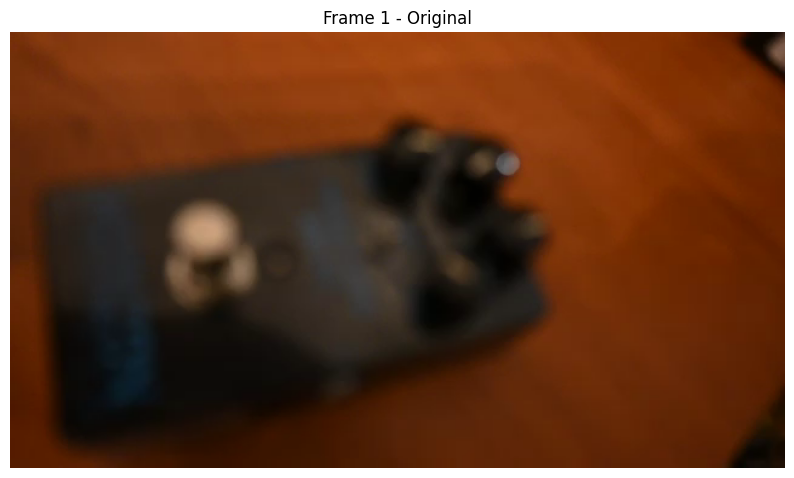

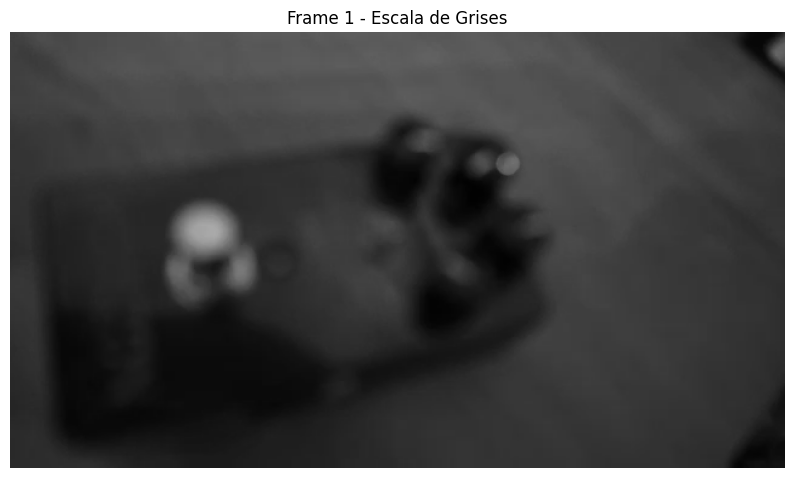

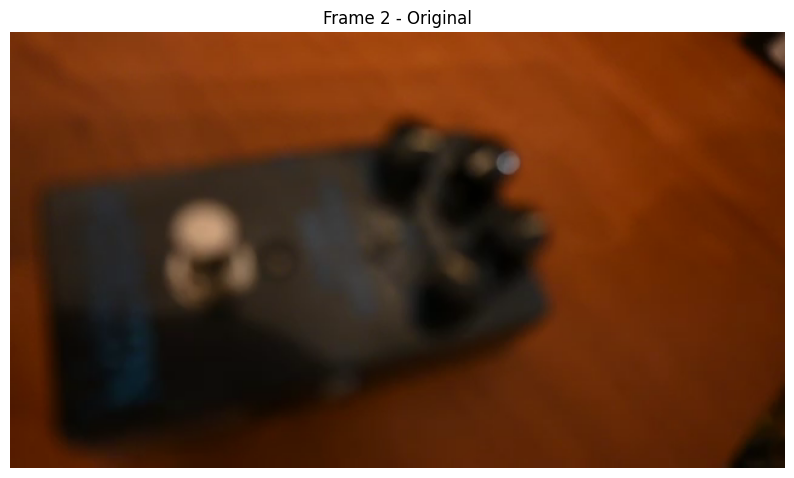

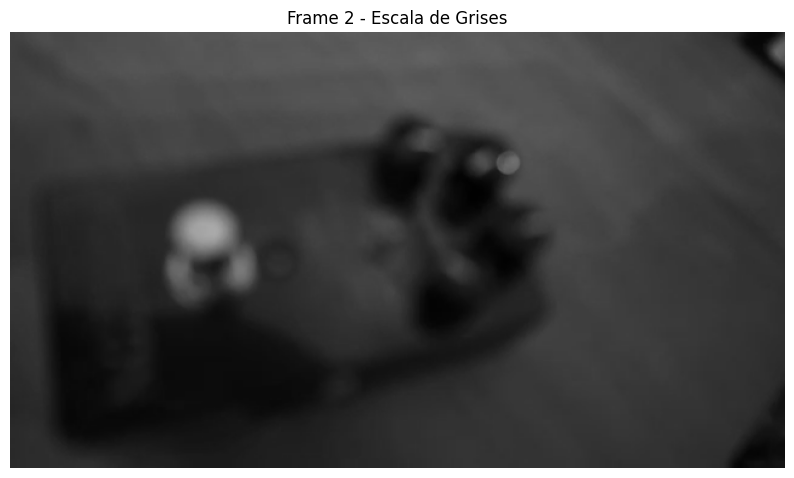

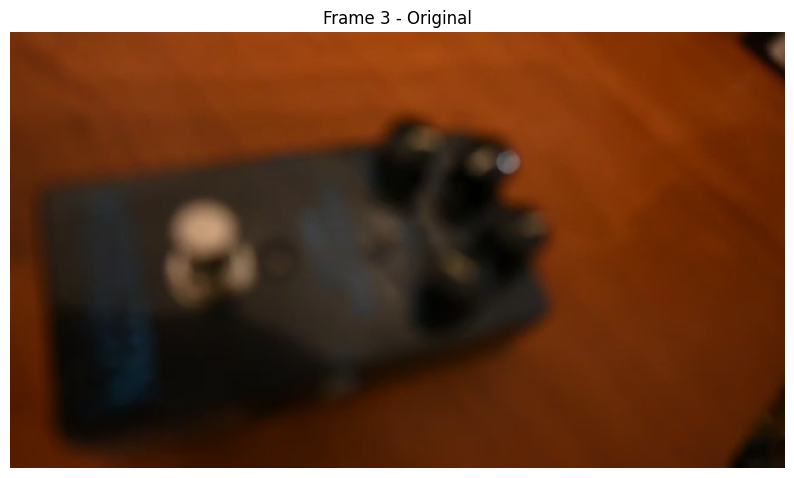

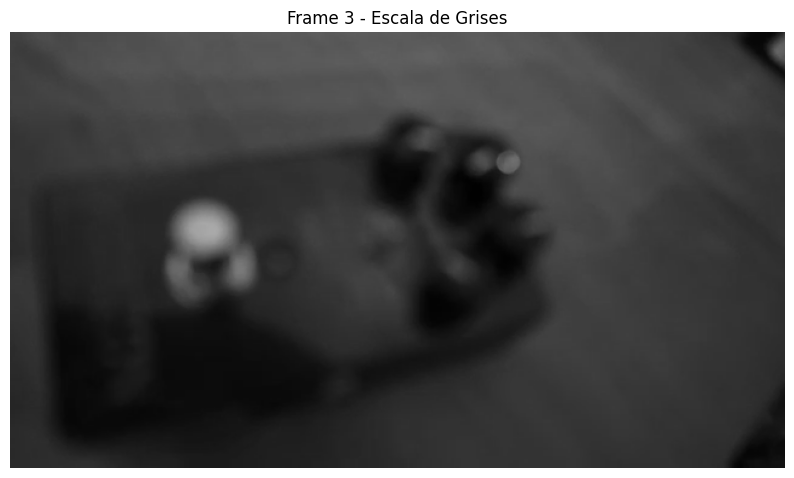

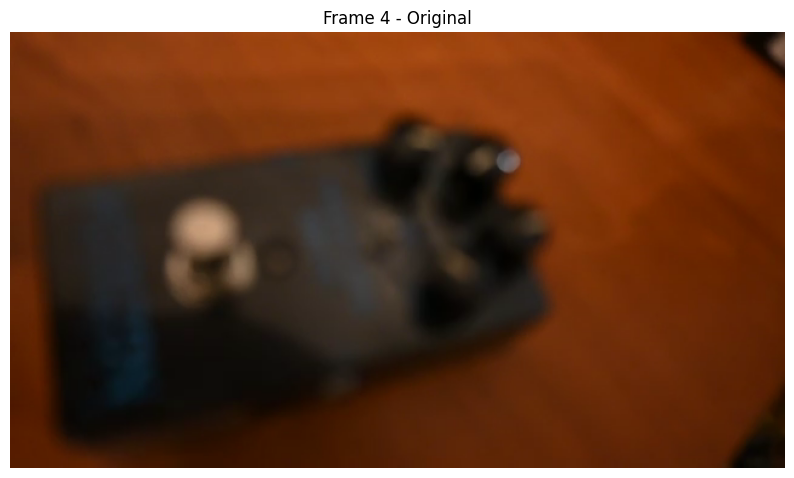

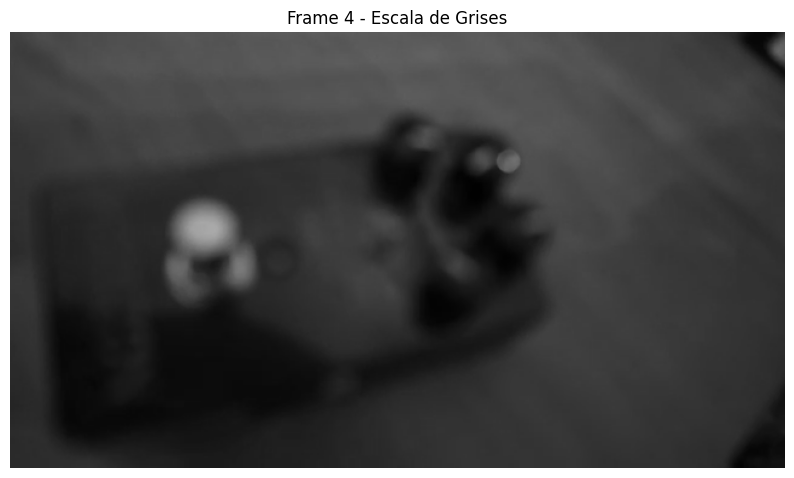

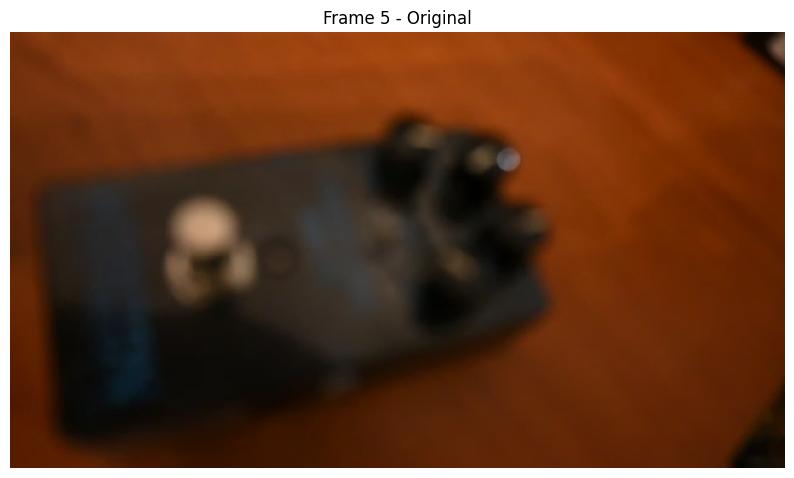

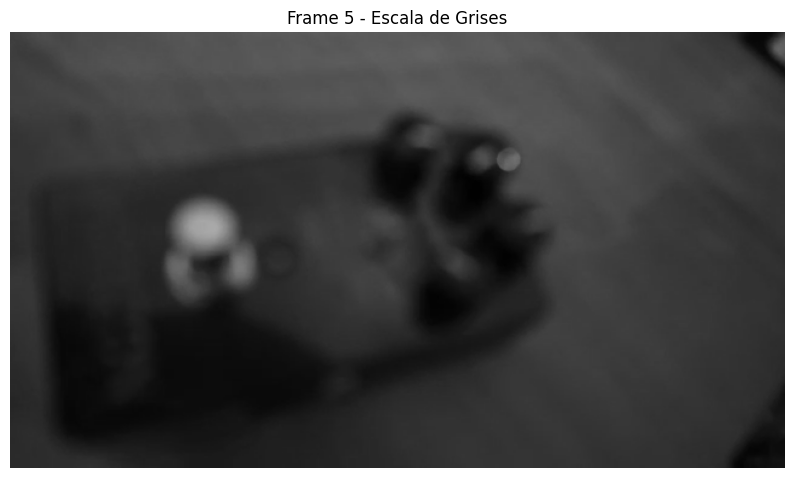

In [57]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

if not captura_video.isOpened():
    print("Error al abrir el archivo de video")
else:
    # Lee los primeros 5 frames del video
    for i in range(0,5):
        ret, frame = captura_video.read()
        if ret:
            frame_gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            mostrar_imagen(frame, titulo=f'Frame {i+1} - Original')
            mostrar_imagen(frame_gris, titulo=f'Frame {i+1} - Escala de Grises')
        else:
            break

captura_video.release()
cv2.destroyAllWindows()

### 1.1 Creamos función para cálculo de métrica de análisis espectral (transformada de Fourier), para todos los frames 

In [58]:
def sharpness_metric_frequency_domain(gray_img):
    # Paso 1: FFT
    F = np.fft.fft2(gray_img)

    # Paso 2: Centrar el espectro
    Fc = np.fft.fftshift(F)

    # Paso 3: Magnitud
    AF = np.abs(Fc)

    # Paso 4: Máximo valor espectral
    M = np.max(AF)

    # Paso 5: Umbral
    thres = M / 1000.0

    # Paso 6: Contar píxeles con valor mayor a umbral
    count_high_freq = np.sum(AF > thres)

    # Paso 7: Normalizar por el total de píxeles
    FM = count_high_freq / AF.size
    return FM


#### Creamos el loop que aplica la función. nos devuelve el frame de valor máximo de métrica y graficamos el valor en todos los frames

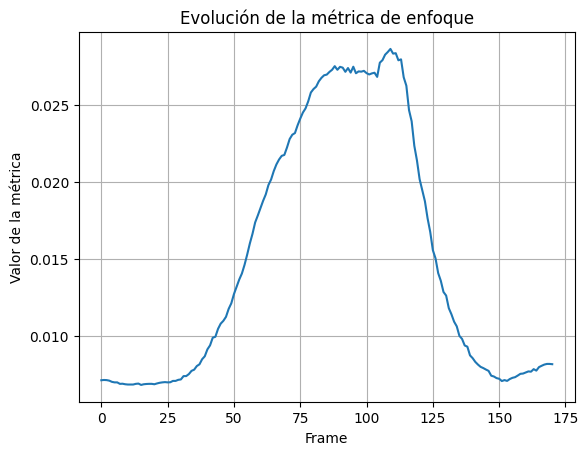

El frame con máximo enfoque es el 109


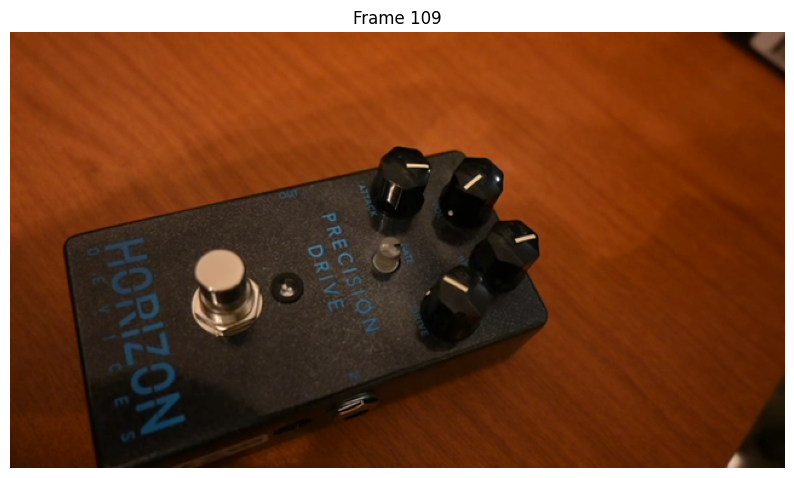

In [59]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []

max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    sharpness = sharpness_metric_frequency_domain(gray)
    sharpness_values.append(sharpness)

    if sharpness>max_value:
        max_value = sharpness
        frame_max_focus = frame.copy()

    frame_idx += 1

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

### 1.2 Medir la métrica de enfoque en una ROI central

#### Creamos la función

In [60]:
def get_central_roi(image, area_ratio= 0.05):
    """
    Extrae una ROI central con un área igual a 'area_ratio' del tamaño total de la imagen.
    :param image: Imagen de entrada en escala de grises.
    :param area_ratio: Fracción del área total (e.g., 0.05 para 5%).
    :return: Subimagen correspondiente a la ROI.
    """
    h, w = image.shape
    area_total = h * w
    area_roi = area_total * area_ratio

    side = int(np.sqrt(area_roi))
    cx, cy = w // 2, h // 2

    x1 = max(cx - side // 2, 0)
    x2 = min(cx + side // 2, w)
    y1 = max(cy - side // 2, 0)
    y2 = min(cy + side // 2, h)

    return image[y1:y2, x1:x2]


#### Aplicamos en el lopp, mostramos resultados y graficamos

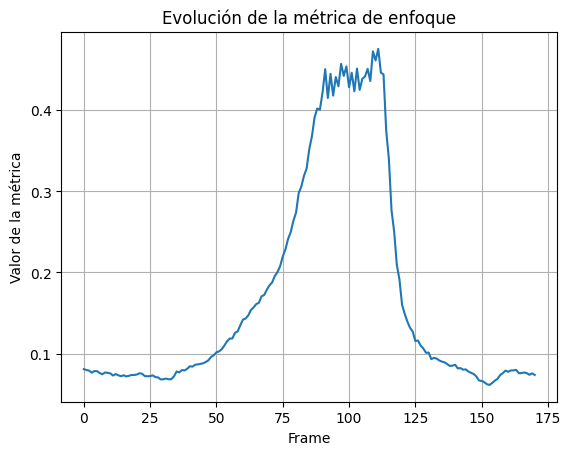

El frame con máximo enfoque es el 111


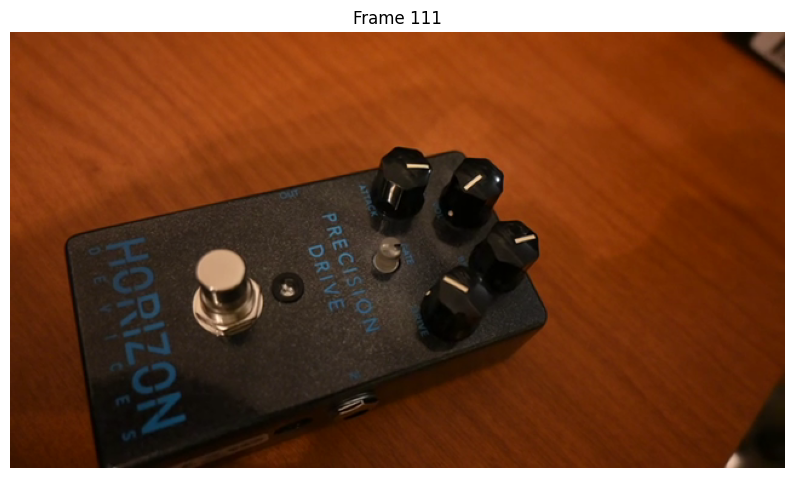

In [61]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []

max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    roi = get_central_roi(gray, area_ratio=0.05)

    sharpness = sharpness_metric_frequency_domain(roi)
    sharpness_values.append(sharpness)

    if sharpness>max_value:
        max_value = sharpness
        frame_max_focus = frame.copy()

    frame_idx += 1

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

In [62]:
def split_into_grid(image, N, M):
    """
    Divide la imagen en una grilla de NxM subimágenes.
    :param image: Imagen en escala de grises.
    :param N: Cantidad de filas.
    :param M: Cantidad de columnas.
    :return: Lista de subimágenes (cada una es una ROI).
    """
    h, w = image.shape
    rois = []
    h_step = h // N
    w_step = w // M
    for i in range(N):
        for j in range(M):
            y1 = i * h_step
            y2 = (i + 1) * h_step if i < N - 1 else h
            x1 = j * w_step
            x2 = (j + 1) * w_step if j < M - 1 else w
            roi = image[y1:y2, x1:x2]
            rois.append(roi)
    return rois


### 1.3 Medir la métrica sobre una matriz de enfoque de arreglo NxM

#### Aplicamos sobre el loop las dimensiones de la matriz, promediamos los valores. Mostramos resultados para 3x3

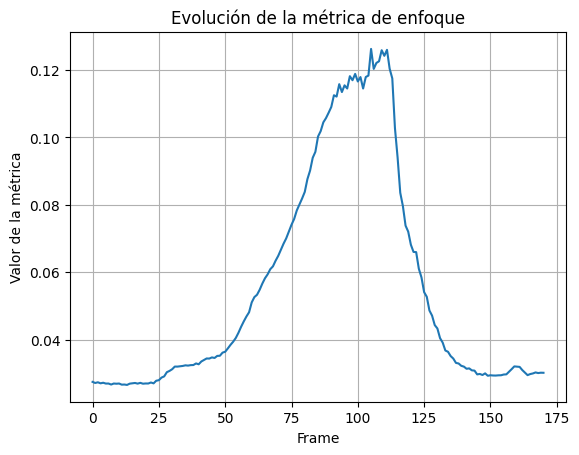

El frame con máximo enfoque es el 105


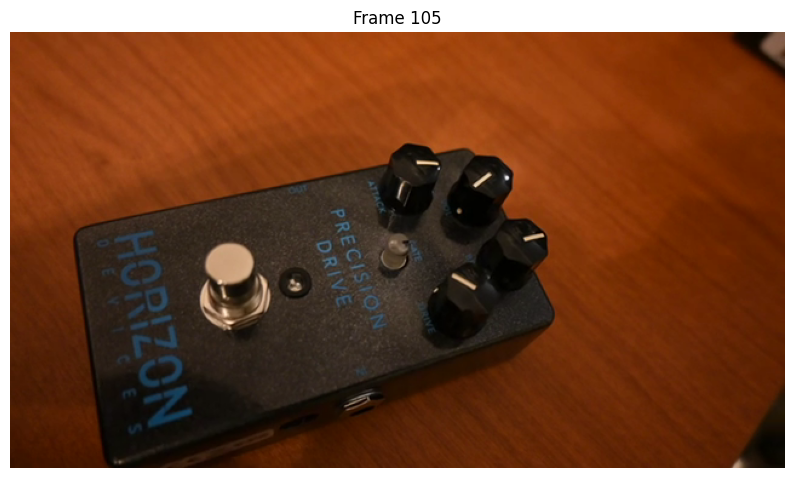

In [63]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []

max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Parámetros de la grilla
    N, M = 3, 3  

    # Dividir imagen en grilla
    rois = split_into_grid(gray, N, M)

    roi_metrics = [sharpness_metric_frequency_domain(roi) for roi in rois]

    # Promedio para todo el frame
    avg_focus = np.mean(roi_metrics)
    sharpness_values.append(avg_focus)

    if avg_focus>max_value:
        max_value = avg_focus
        frame_max_focus = frame.copy()

    frame_idx += 1

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

#### Mostramos resultados para 5x5

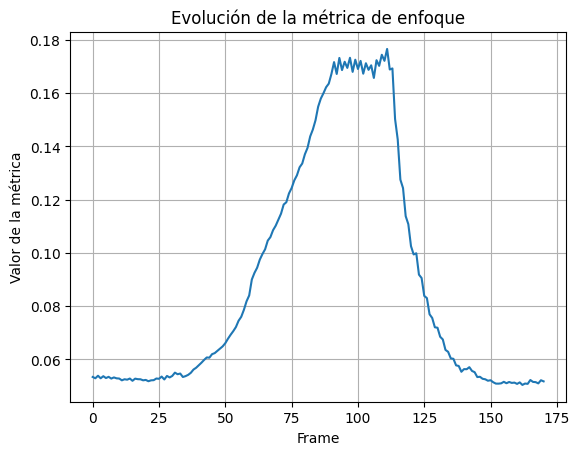

El frame con máximo enfoque es el 111


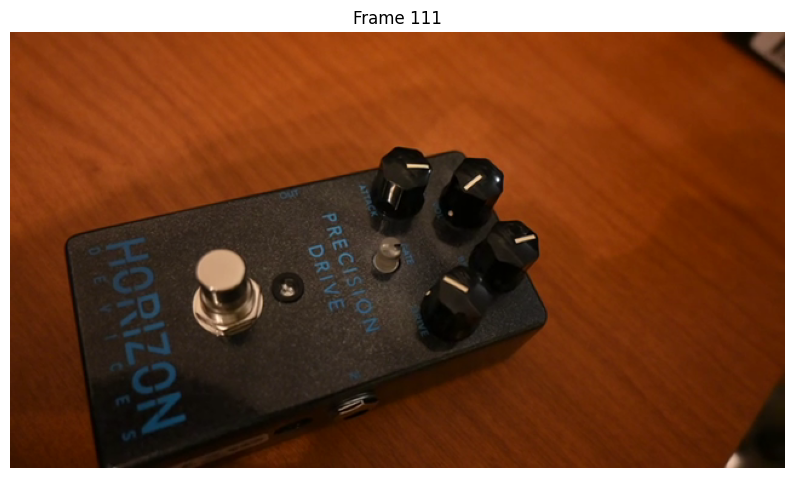

In [64]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []

max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    # Convertimos a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Parámetros de la grilla
    N, M = 5, 5  

    # Dividir imagen en grilla
    rois = split_into_grid(gray, N, M)

    roi_metrics = [sharpness_metric_frequency_domain(roi) for roi in rois]

    avg_focus = np.mean(roi_metrics)
    sharpness_values.append(avg_focus)

    if avg_focus>max_value:
        max_value = avg_focus
        frame_max_focus = frame.copy()

    frame_idx += 1

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

#### Mostramos resultados para 7x5

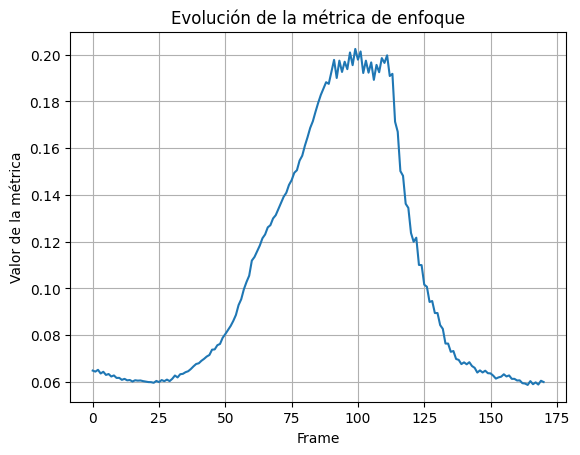

El frame con máximo enfoque es el 99


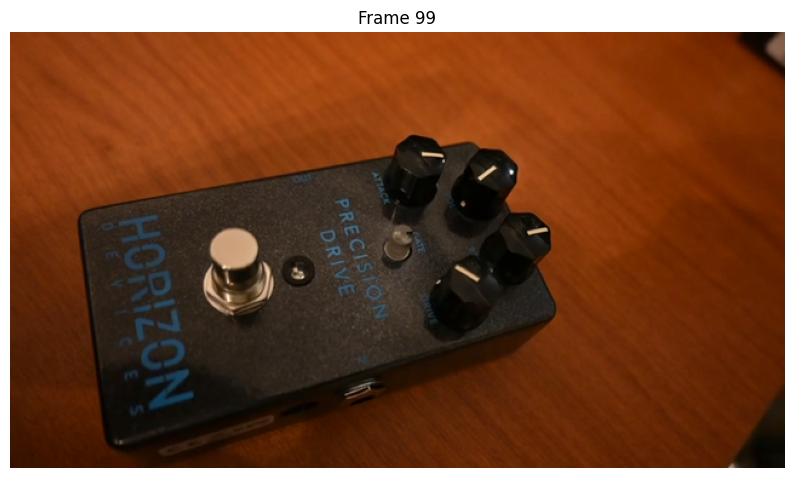

In [65]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []

max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    # Convertimos a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Parámetros de la grilla
    N, M = 7, 5 

    # Dividir imagen en grilla
    rois = split_into_grid(gray, N, M)

    roi_metrics = [sharpness_metric_frequency_domain(roi) for roi in rois]

    avg_focus = np.mean(roi_metrics)
    sharpness_values.append(avg_focus)

    if avg_focus>max_value:
        max_value = avg_focus
        frame_max_focus = frame.copy()

    frame_idx += 1

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

## Ejercicio 2: Cambio de métrica de enfoque

### Elegimos como primer caso la métrica Tenengrad (GRA6)

#### Creamos la función

In [66]:
def tenengrad_focus_metric(gray_img):
    # Gradientes con operador Sobel
    gx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
    
    # Magnitud del gradiente
    magnitude_squared = gx**2 + gy**2

    # Suma total como medida de enfoque
    return np.sum(magnitude_squared)


#### Aplicamos en el loop

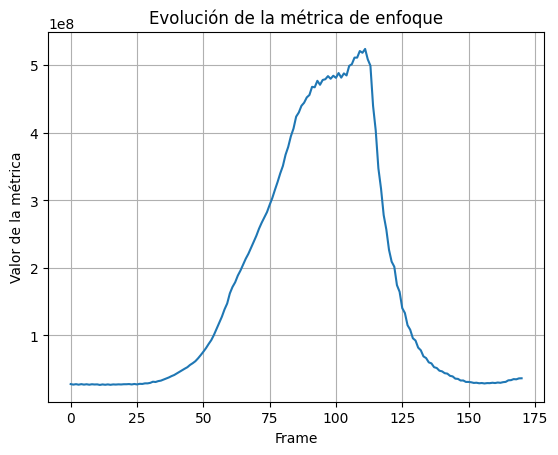

El frame con máximo enfoque es el 111


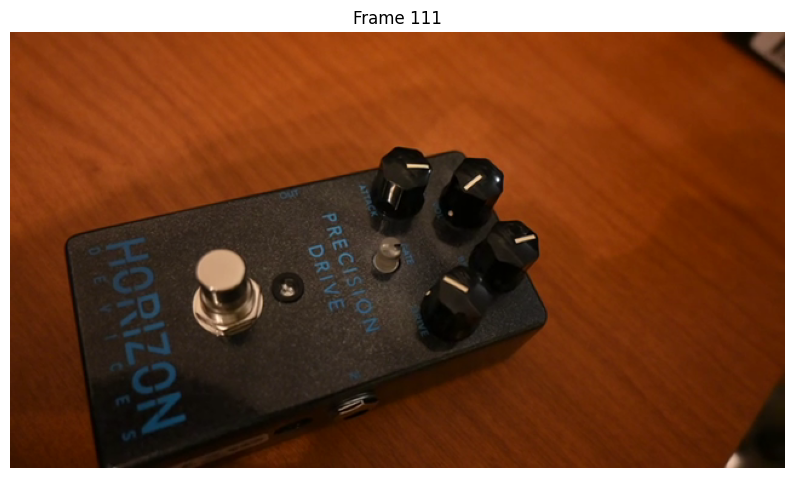

In [67]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []
max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    sharp_tenengrad = tenengrad_focus_metric(gray)
    sharpness_values.append(sharp_tenengrad)

    if sharp_tenengrad>max_value:
        max_value = sharp_tenengrad
        frame_max_focus = frame.copy()

    frame_idx += 1

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

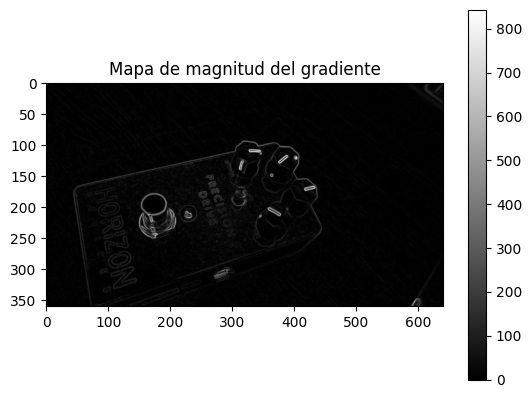

In [68]:
gray = cv2.cvtColor(frame_max_focus, cv2.COLOR_BGR2GRAY)

# Ver el mapa de magnitud del gradiente en un frame
gx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(gx**2 + gy**2)

plt.imshow(magnitude, cmap='gray')
plt.title("Mapa de magnitud del gradiente")
plt.colorbar()
plt.show()


### Hacemos una segunda prueba con la de Energy of Laplacian (LAP1)

#### Creamos la función

In [69]:
def variance_of_laplacian(gray_img):
    lap = cv2.Laplacian(gray_img, cv2.CV_64F)
    return lap.var()

#### Aplicamos en el loop

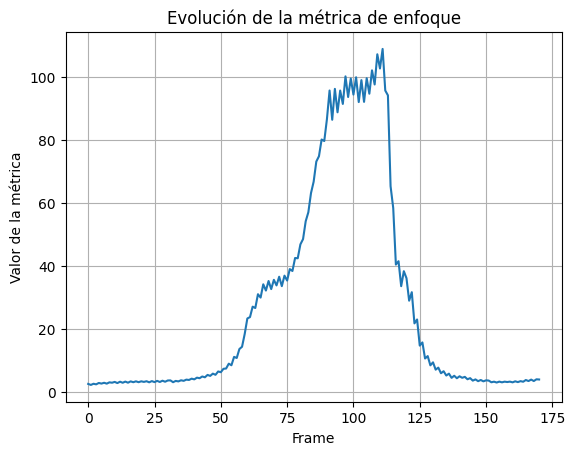

El frame con máximo enfoque es el 111


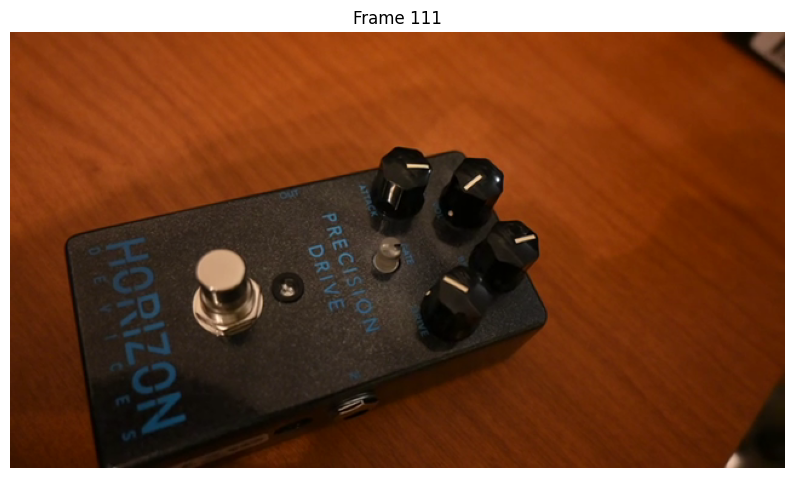

In [70]:
video_path = 'focus_video.mov'
captura_video = cv2.VideoCapture(video_path)

sharpness_values = []

max_value = 0
frame_max_focus = None

frame_idx = 0
while True:
    ret, frame = captura_video.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    sharp_laplacian = variance_of_laplacian(gray)
    sharpness_values.append(sharp_laplacian)
    frame_idx += 1

    if sharp_laplacian>max_value:
        max_value = sharp_laplacian
        frame_max_focus = frame.copy()

captura_video.release()

graficar_metrica_enfoque(sharpness_values)

max_idx = np.argmax(sharpness_values)
print(f"El frame con máximo enfoque es el {max_idx}")

mostrar_imagen(frame_max_focus, titulo=f"Frame {max_idx}")

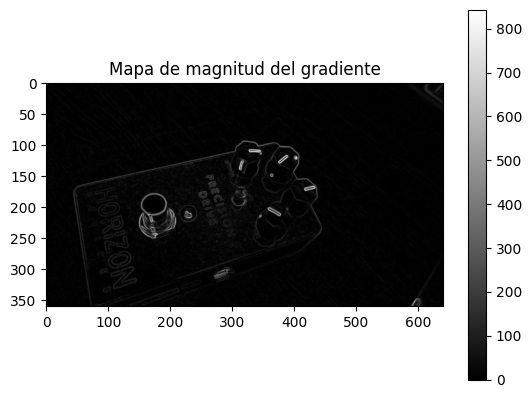

In [71]:
gray = cv2.cvtColor(frame_max_focus, cv2.COLOR_BGR2GRAY)

# Ver el mapa de magnitud del gradiente en un frame
gx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(gx**2 + gy**2)

plt.imshow(magnitude, cmap='gray')
plt.title("Mapa de magnitud del gradiente")
plt.colorbar()
plt.show()